In [68]:
# Importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
# Loading the dataset
df = pd.read_csv('spam.csv', encoding='latin-1', engine='python',usecols=['v1','v2'])
# Renaming the columns
df.columns = ['label', 'message']
# Displaying the first 5 rows of the dataset
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
# Displaying the dimensions of the dataset
df.shape

(5572, 2)

In [71]:
# Summarizing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [72]:
# Checking for missing values in the dataset
df.isnull().sum()

label      0
message    0
dtype: int64

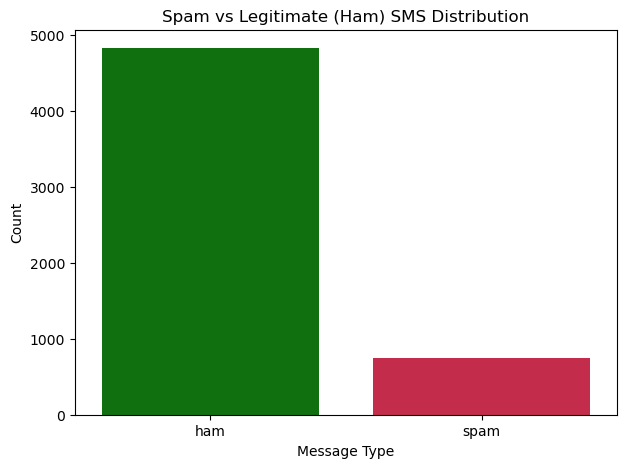

In [73]:
# Visualizing the dataset
plt.figure(figsize=(7, 5))
custom_palette = ['green', 'crimson']
sns.countplot(data=df, x='label', palette=custom_palette)
plt.title('Spam vs Legitimate (Ham) SMS Distribution')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

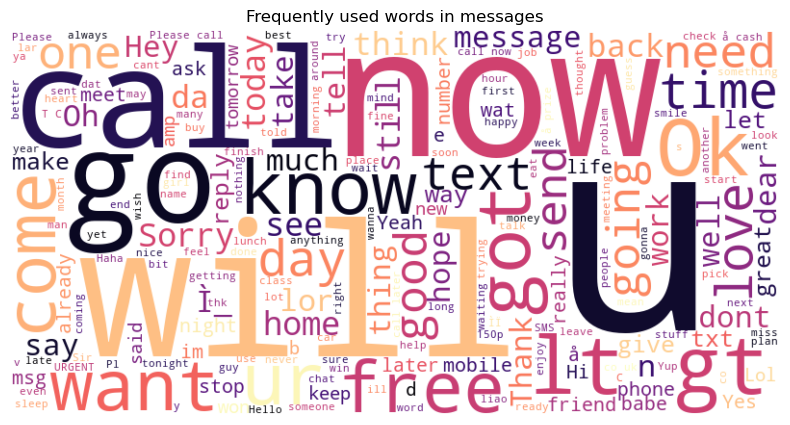

In [75]:
# Plotting a word cloud to understand the frequently used words in the messages
from wordcloud import WordCloud
all_messages = ' '.join(df['message'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma',max_words=200).generate(all_messages)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Frequently used words in messages')
plt.axis('off')
plt.show()

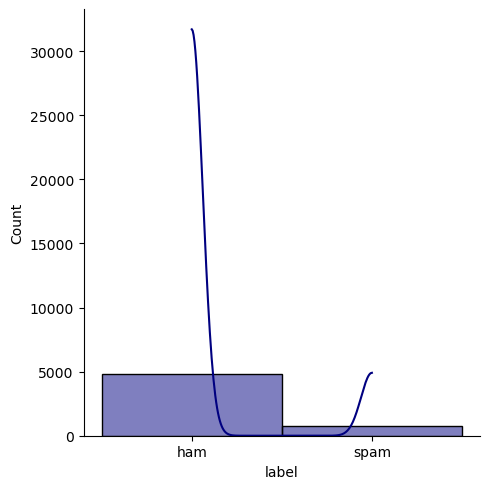

In [77]:
# Plotting a distribution plot along with KDE (Kernel Density Estimate) curve to visualize the distribution of spam and ham messages
sns.displot(df.label, kde=True, color='navy')

In [78]:
# Encoding the categorical labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [79]:
# Splitting the dataset into training and testing sets
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [90]:
# Building a Naive Bayes model and making predictions using it
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_y_pred = nb_model.predict(X_test_tfidf)

In [91]:
# Evaluating the Naive Bayes model
print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Classification Report:\n", classification_report(y_test, nb_y_pred))

Accuracy: 0.9754784688995215
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



In [93]:
# Two sample messages- one is ham and one is spam
nb_new_messages = ["Hey Alex how are you?", "Congratulations! you have won 1 Million dollars in lottery"]

# Transforming the messages into TF-IDF features
nb_new_messages_tfidf = vectorizer.transform(nb_new_messages)

# Predicting both messages
predictions = nb_model.predict(nb_new_messages_tfidf)
for i, message in enumerate(nb_new_messages):
    print(f"Message: '{message}' - Prediction: {'Spam' if predictions[i] == 1 else 'Ham'}")


Message: 'Hey Alex how are you?' - Prediction: Ham
Message: 'Congratulations! you have won 1 Million dollars in lottery' - Prediction: Spam


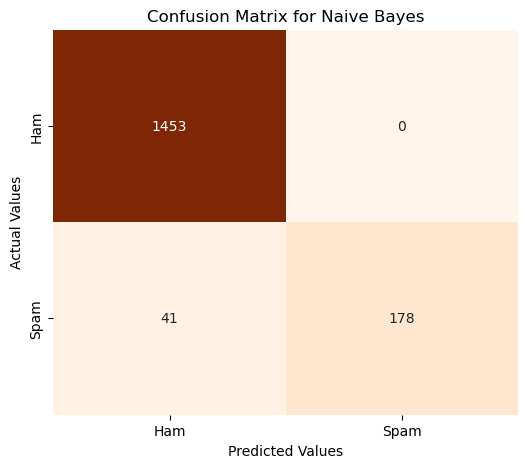

In [94]:
# Plotting the confusion matrix for Naive Bayes model
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,nb_y_pred), annot=True, fmt="d", cmap='Oranges', cbar=False, xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title(f"Confusion Matrix for Naive Bayes")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

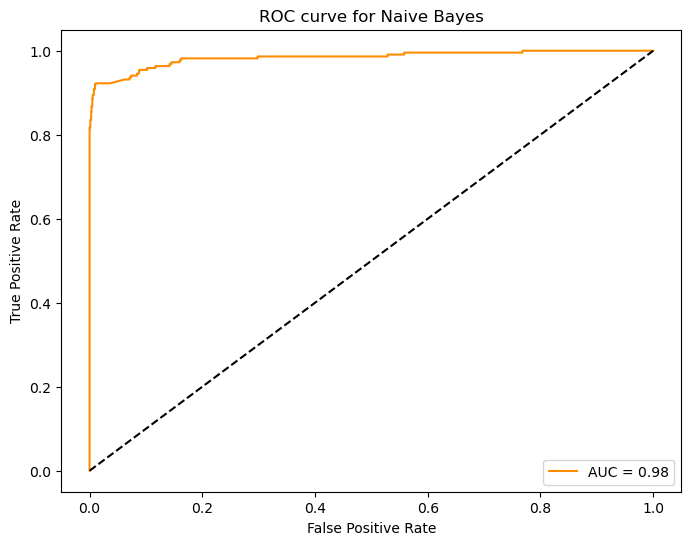

In [103]:
from sklearn.metrics import auc
# Computing the ROC curve and AUC score for Naive Bayes model
# An AUC score close to 1 suggests better model performance
nb_y_prob = nb_model.predict_proba(X_test_tfidf)[:,1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_prob)
nb_auc = auc(nb_fpr, nb_tpr)
plt.figure(figsize=(8,6))
plt.plot(nb_fpr, nb_tpr, color='darkorange', label=f'AUC = {nb_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title("ROC curve for Naive Bayes")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [105]:
# Building a Logistic Regression model and making predictions using it
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)
logreg_y_pred = logreg_model.predict(X_test_tfidf)

In [106]:
# Evaluating the Logistic Regression model
print("Accuracy:", accuracy_score(y_test, logreg_y_pred))
print("Classification Report:\n", classification_report(y_test, logreg_y_pred))

Accuracy: 0.9605263157894737
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       0.98      0.71      0.83       219

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [124]:
# Two sample messages- one is ham and one is spam
logreg_new_messages = ["Call me back sis its important", "Congratulations! you have won 1 Million dollars in lottery"]
logreg_new_messages_tfidf = vectorizer.transform(logreg_new_messages)
predictions = logreg_model.predict(logreg_new_messages_tfidf)
for i, message in enumerate(logreg_new_messages):
    print(f"Message: '{message}' - Prediction: {'Spam' if predictions[i] == 1 else 'Ham'}")

Message: 'Call me back sis its important' - Prediction: Ham
Message: 'Congratulations! you have won 1 Million dollars in lottery' - Prediction: Ham


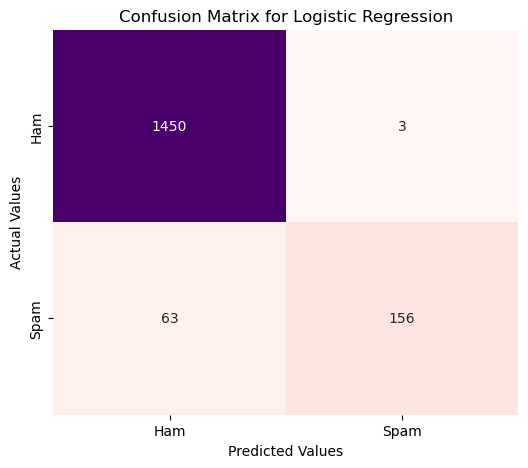

In [125]:
# Plotting the confusion matrix for Logistic Regression model
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,logreg_y_pred), annot=True, fmt="d", cmap='RdPu', cbar=False, xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title(f"Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

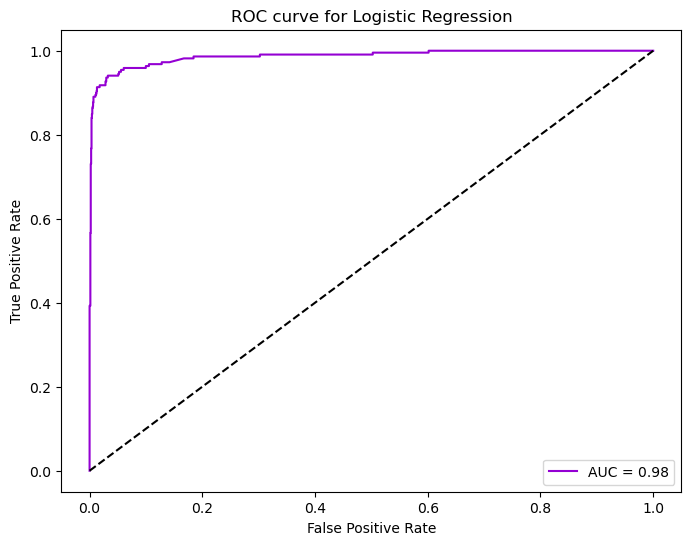

In [126]:
# Computing the ROC curve and AUC score for Logistic Regression model
logreg_y_prob = logreg_model.predict_proba(X_test_tfidf)[:,1]
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_y_prob)
logreg_auc = auc(logreg_fpr, logreg_tpr)
plt.figure(figsize=(8,6))
plt.plot(logreg_fpr, logreg_tpr, color='darkviolet', label=f'AUC = {nb_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title("ROC curve for Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [127]:
# Building an SVM model and making predictions using it
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)
svm_y_pred = svm_model.predict(X_test_tfidf)

In [128]:
# Evaluating the SVM model
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.9796650717703349
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.86      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [136]:
# Predicting two sample messages- one should be ham and one should be spam
svm_new_messages = ["Let me know when you are free Kevin, its been a while since we last met", "Claim your dream car for only $200"]
svm_new_messages_tfidf = vectorizer.transform(svm_new_messages)
predictions = svm_model.predict(svm_new_messages_tfidf)
for i, message in enumerate(svm_new_messages):
    print(f"Message: '{message}' - Prediction: {'Spam' if predictions[i] == 1 else 'Ham'}")

Message: 'Let me know when you are free Kevin, its been a while since we last met' - Prediction: Ham
Message: 'Claim your dream car for only $200' - Prediction: Spam


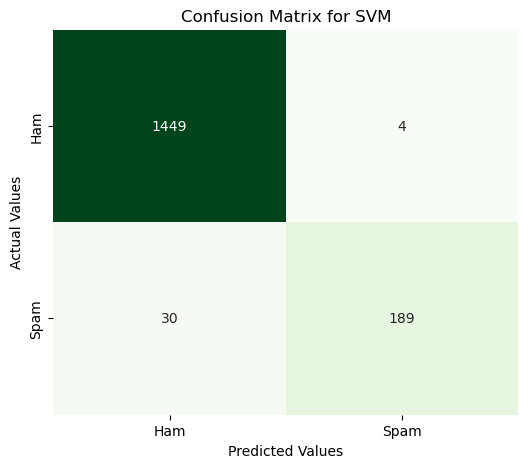

In [139]:
# Plotting the confusion matrix for SVM model
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,svm_y_pred), annot=True, fmt="d", cmap='Greens', cbar=False, xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title(f"Confusion Matrix for SVM")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

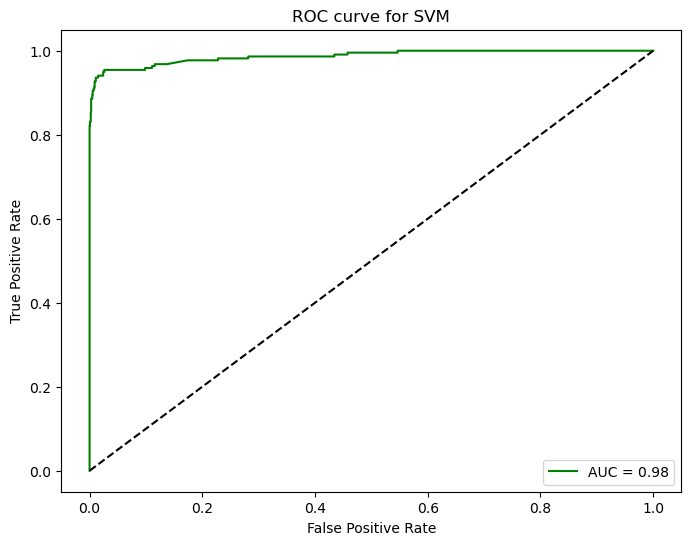

In [140]:
# Computing the ROC curve and AUC score for SVM model
svm_y_prob = svm_model.predict_proba(X_test_tfidf)[:,1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_prob)
svm_auc = auc(svm_fpr, svm_tpr)
plt.figure(figsize=(8,6))
plt.plot(svm_fpr, svm_tpr, color='green', label=f'AUC = {nb_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title("ROC curve for SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [142]:
# Comparing the Naive Bayes, Logistic Regression and SVM (Support Vector Machine) models
nb_accuracy = accuracy_score(y_test, nb_y_pred)
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\nAccuracy of the Naive Bayes model:", nb_accuracy)
print("Accuracy of the Logistic Regression model:", logreg_accuracy)
print("Accuracy of the SVM model:", svm_accuracy)


Accuracy of the Naive Bayes model: 0.9754784688995215
Accuracy of the Logistic Regression model: 0.9605263157894737
Accuracy of the SVM model: 0.9796650717703349
